<table class="tfo-notebook-buttons" align="left">
  <td><a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/ko/tutorials/structured_data/time_series.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png"> Google Colab에서 실행하기</a></td>
  <td><a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/ko/tutorials/structured_data/time_series.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png">GitHub에서 소스 보기</a></td>
  <td><a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/ko/tutorials/structured_data/time_series.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png">Download notebook</a></td>
</table>

In [146]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split

from keras import layers, models
from sklearn import preprocessing
from keras import datasets
from keraspp.skeras import plot_loss
from keras.models import load_model

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from sklearn import model_selection

from keraspp import skeras

In [147]:
def load_data(fname='international-airline-passengers.csv'):
    dataset = pd.read_csv(fname, usecols=[1], engine='python', skipfooter=3)
    data = dataset.values.reshape(-1)
    plt.plot(data)
    plt.xlabel('Time'); plt.ylabel('#Passengers')
    plt.title('Original Data')
    plt.show()

    # data normalize
    data_dn = (data - np.mean(data)) / np.std(data) / 5
    plt.plot(data_dn)
    plt.xlabel('Time'); plt.ylabel('Normalized #Passengers')
    plt.title('Normalized data by $E[]$ and $5\sigma$')
    plt.show()
    
    return data_dn

In [148]:
def get_Xy(data, D=12):
    # make X and y
    X_l = []
    y_l = []
    N = len(data)
    assert N > D, "N should be larger than D, where N is len(data)"
    for ii in range(N-D-1):
        X_l.append(data[ii:ii+D])
        y_l.append(data[ii+D])
    X = np.array(X_l)
    X = X.reshape(X.shape[0], X.shape[1], 1)
    y = np.array(y_l)
    print(X.shape, y.shape)
    return X, y

In [149]:
def rnn_model(shape):
    m_x = layers.Input(shape=shape) #X.shape[1:]
    m_h = layers.LSTM(10)(m_x)
    m_y = layers.Dense(1)(m_h)
    m = models.Model(m_x, m_y)
    
    m.compile('adam', 'mean_squared_error')
    
    m.summary()
    
    return m

In [150]:
class Dataset:
    def __init__(self, fname='international-airline-passengers.csv', D=12):
        data_dn = load_data(fname=fname)
        X, y = get_Xy(data_dn, D=D)
        X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)  
        
        self.X, self.y = X, y
        self.X_train, self.X_test, self.y_train, self.y_test = X_train, X_test, y_train, y_test   

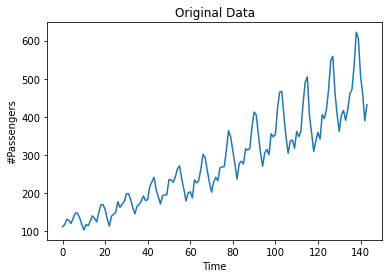

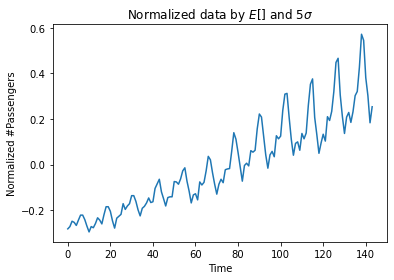

(131, 12, 1) (131,)
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 12, 1)]           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [151]:
data = Dataset()
shape = data.X.shape[1:]
model = rnn_model(shape)

In [152]:
X_train, X_test, y_train, y_test = data.X_train, data.X_test, data.y_train, data.y_test
X, y = data.X, data.y
m = model

In [156]:
epochs=400
h = model.fit(X_train, y_train, epochs=1000, batch_size=100, validation_data=(X_test, y_test))

Epoch 1/1000
2/2 [==============================] - 1s 879ms/step - loss: 0.0308 - val_loss: 0.0300
Epoch 2/1000
2/2 [==============================] - 0s 89ms/step - loss: 0.0296 - val_loss: 0.0289
Epoch 3/1000
2/2 [==============================] - 0s 99ms/step - loss: 0.0285 - val_loss: 0.0279
Epoch 4/1000
2/2 [==============================] - 0s 107ms/step - loss: 0.0275 - val_loss: 0.0269
Epoch 5/1000
2/2 [==============================] - 0s 96ms/step - loss: 0.0264 - val_loss: 0.0259
Epoch 6/1000
2/2 [==============================] - 0s 92ms/step - loss: 0.0254 - val_loss: 0.0248
Epoch 7/1000
2/2 [==============================] - 0s 92ms/step - loss: 0.0244 - val_loss: 0.0238
Epoch 8/1000
2/2 [==============================] - 0s 92ms/step - loss: 0.0235 - val_loss: 0.0228
Epoch 9/1000
2/2 [==============================] - 0s 91ms/step - loss: 0.0225 - val_loss: 0.0220
Epoch 10/1000
2/2 [==============================] - 0s 90ms/step - loss: 0.0217 - val_loss: 0.0211
Epoch 1

Epoch 83/1000
2/2 [==============================] - 0s 91ms/step - loss: 0.0067 - val_loss: 0.0072
Epoch 84/1000
2/2 [==============================] - 0s 89ms/step - loss: 0.0067 - val_loss: 0.0072
Epoch 85/1000
2/2 [==============================] - 0s 90ms/step - loss: 0.0067 - val_loss: 0.0073
Epoch 86/1000
2/2 [==============================] - 0s 90ms/step - loss: 0.0067 - val_loss: 0.0073
Epoch 87/1000
2/2 [==============================] - 0s 96ms/step - loss: 0.0066 - val_loss: 0.0073
Epoch 88/1000
2/2 [==============================] - 0s 91ms/step - loss: 0.0066 - val_loss: 0.0073
Epoch 89/1000
2/2 [==============================] - 0s 90ms/step - loss: 0.0066 - val_loss: 0.0073
Epoch 90/1000
2/2 [==============================] - 0s 89ms/step - loss: 0.0066 - val_loss: 0.0072
Epoch 91/1000
2/2 [==============================] - 0s 89ms/step - loss: 0.0066 - val_loss: 0.0072
Epoch 92/1000
2/2 [==============================] - 0s 89ms/step - loss: 0.0066 - val_loss: 0.0072


2/2 [==============================] - 0s 88ms/step - loss: 0.0062 - val_loss: 0.0069
Epoch 165/1000
2/2 [==============================] - 0s 89ms/step - loss: 0.0062 - val_loss: 0.0069
Epoch 166/1000
2/2 [==============================] - 0s 89ms/step - loss: 0.0062 - val_loss: 0.0068
Epoch 167/1000
2/2 [==============================] - 0s 89ms/step - loss: 0.0062 - val_loss: 0.0068
Epoch 168/1000
2/2 [==============================] - 0s 87ms/step - loss: 0.0062 - val_loss: 0.0067
Epoch 169/1000
2/2 [==============================] - 0s 87ms/step - loss: 0.0062 - val_loss: 0.0067
Epoch 170/1000
2/2 [==============================] - 0s 88ms/step - loss: 0.0062 - val_loss: 0.0068
Epoch 171/1000
2/2 [==============================] - 0s 88ms/step - loss: 0.0062 - val_loss: 0.0068
Epoch 172/1000
2/2 [==============================] - 0s 88ms/step - loss: 0.0062 - val_loss: 0.0068
Epoch 173/1000
2/2 [==============================] - 0s 88ms/step - loss: 0.0063 - val_loss: 0.0068
Epoch

2/2 [==============================] - 0s 89ms/step - loss: 0.0059 - val_loss: 0.0076
Epoch 246/1000
2/2 [==============================] - 0s 88ms/step - loss: 0.0060 - val_loss: 0.0077
Epoch 247/1000
2/2 [==============================] - 0s 90ms/step - loss: 0.0061 - val_loss: 0.0076
Epoch 248/1000
2/2 [==============================] - 0s 89ms/step - loss: 0.0060 - val_loss: 0.0073
Epoch 249/1000
2/2 [==============================] - 0s 90ms/step - loss: 0.0059 - val_loss: 0.0071
Epoch 250/1000
2/2 [==============================] - 0s 92ms/step - loss: 0.0058 - val_loss: 0.0070
Epoch 251/1000
2/2 [==============================] - 0s 89ms/step - loss: 0.0058 - val_loss: 0.0069
Epoch 252/1000
2/2 [==============================] - 0s 88ms/step - loss: 0.0058 - val_loss: 0.0068
Epoch 253/1000
2/2 [==============================] - 0s 88ms/step - loss: 0.0058 - val_loss: 0.0068
Epoch 254/1000
2/2 [==============================] - 0s 89ms/step - loss: 0.0057 - val_loss: 0.0067
Epoch

2/2 [==============================] - 0s 89ms/step - loss: 0.0050 - val_loss: 0.0057
Epoch 327/1000
2/2 [==============================] - 0s 89ms/step - loss: 0.0050 - val_loss: 0.0058
Epoch 328/1000
2/2 [==============================] - 0s 89ms/step - loss: 0.0050 - val_loss: 0.0058
Epoch 329/1000
2/2 [==============================] - 0s 87ms/step - loss: 0.0050 - val_loss: 0.0058
Epoch 330/1000
2/2 [==============================] - 0s 87ms/step - loss: 0.0050 - val_loss: 0.0059
Epoch 331/1000
2/2 [==============================] - 0s 302ms/step - loss: 0.0050 - val_loss: 0.0059
Epoch 332/1000
2/2 [==============================] - 0s 89ms/step - loss: 0.0050 - val_loss: 0.0058
Epoch 333/1000
2/2 [==============================] - 0s 90ms/step - loss: 0.0049 - val_loss: 0.0056
Epoch 334/1000
2/2 [==============================] - 0s 87ms/step - loss: 0.0049 - val_loss: 0.0054
Epoch 335/1000
2/2 [==============================] - 0s 88ms/step - loss: 0.0049 - val_loss: 0.0054
Epoc

2/2 [==============================] - 0s 89ms/step - loss: 0.0037 - val_loss: 0.0045
Epoch 408/1000
2/2 [==============================] - 0s 90ms/step - loss: 0.0038 - val_loss: 0.0046
Epoch 409/1000
2/2 [==============================] - 0s 91ms/step - loss: 0.0038 - val_loss: 0.0046
Epoch 410/1000
2/2 [==============================] - 0s 91ms/step - loss: 0.0038 - val_loss: 0.0047
Epoch 411/1000
2/2 [==============================] - 0s 90ms/step - loss: 0.0040 - val_loss: 0.0047
Epoch 412/1000
2/2 [==============================] - 0s 89ms/step - loss: 0.0041 - val_loss: 0.0046
Epoch 413/1000
2/2 [==============================] - 0s 89ms/step - loss: 0.0041 - val_loss: 0.0044
Epoch 414/1000
2/2 [==============================] - 0s 90ms/step - loss: 0.0040 - val_loss: 0.0043
Epoch 415/1000
2/2 [==============================] - 0s 90ms/step - loss: 0.0039 - val_loss: 0.0041
Epoch 416/1000
2/2 [==============================] - 0s 88ms/step - loss: 0.0037 - val_loss: 0.0039
Epoch

2/2 [==============================] - 0s 89ms/step - loss: 0.0021 - val_loss: 0.0029
Epoch 489/1000
2/2 [==============================] - 0s 90ms/step - loss: 0.0020 - val_loss: 0.0032
Epoch 490/1000
2/2 [==============================] - 0s 89ms/step - loss: 0.0021 - val_loss: 0.0036
Epoch 491/1000
2/2 [==============================] - 0s 90ms/step - loss: 0.0023 - val_loss: 0.0036
Epoch 492/1000
2/2 [==============================] - 0s 90ms/step - loss: 0.0022 - val_loss: 0.0032
Epoch 493/1000
2/2 [==============================] - 0s 93ms/step - loss: 0.0020 - val_loss: 0.0029
Epoch 494/1000
2/2 [==============================] - 0s 89ms/step - loss: 0.0020 - val_loss: 0.0027
Epoch 495/1000
2/2 [==============================] - 0s 90ms/step - loss: 0.0021 - val_loss: 0.0027
Epoch 496/1000
2/2 [==============================] - 0s 88ms/step - loss: 0.0021 - val_loss: 0.0027
Epoch 497/1000
2/2 [==============================] - 0s 91ms/step - loss: 0.0021 - val_loss: 0.0027
Epoch

2/2 [==============================] - 0s 88ms/step - loss: 0.0016 - val_loss: 0.0027
Epoch 570/1000
2/2 [==============================] - 0s 89ms/step - loss: 0.0016 - val_loss: 0.0028
Epoch 571/1000
2/2 [==============================] - 0s 89ms/step - loss: 0.0016 - val_loss: 0.0027
Epoch 572/1000
2/2 [==============================] - 0s 88ms/step - loss: 0.0016 - val_loss: 0.0026
Epoch 573/1000
2/2 [==============================] - 0s 91ms/step - loss: 0.0015 - val_loss: 0.0025
Epoch 574/1000
2/2 [==============================] - 0s 92ms/step - loss: 0.0015 - val_loss: 0.0023
Epoch 575/1000
2/2 [==============================] - 0s 92ms/step - loss: 0.0016 - val_loss: 0.0023
Epoch 576/1000
2/2 [==============================] - 0s 89ms/step - loss: 0.0016 - val_loss: 0.0023
Epoch 577/1000
2/2 [==============================] - 0s 92ms/step - loss: 0.0016 - val_loss: 0.0024
Epoch 578/1000
2/2 [==============================] - 0s 89ms/step - loss: 0.0015 - val_loss: 0.0023
Epoch

2/2 [==============================] - 0s 92ms/step - loss: 0.0017 - val_loss: 0.0021
Epoch 651/1000
2/2 [==============================] - 0s 89ms/step - loss: 0.0014 - val_loss: 0.0025
Epoch 652/1000
2/2 [==============================] - 0s 89ms/step - loss: 0.0015 - val_loss: 0.0031
Epoch 653/1000
2/2 [==============================] - 0s 89ms/step - loss: 0.0018 - val_loss: 0.0034
Epoch 654/1000
2/2 [==============================] - 0s 91ms/step - loss: 0.0020 - val_loss: 0.0029
Epoch 655/1000
2/2 [==============================] - 0s 89ms/step - loss: 0.0017 - val_loss: 0.0024
Epoch 656/1000
2/2 [==============================] - 0s 90ms/step - loss: 0.0015 - val_loss: 0.0022
Epoch 657/1000
2/2 [==============================] - 0s 92ms/step - loss: 0.0015 - val_loss: 0.0021
Epoch 658/1000
2/2 [==============================] - 0s 92ms/step - loss: 0.0016 - val_loss: 0.0021
Epoch 659/1000
2/2 [==============================] - 0s 90ms/step - loss: 0.0016 - val_loss: 0.0021
Epoch

2/2 [==============================] - 0s 89ms/step - loss: 0.0016 - val_loss: 0.0025
Epoch 732/1000
2/2 [==============================] - 0s 90ms/step - loss: 0.0016 - val_loss: 0.0024
Epoch 733/1000
2/2 [==============================] - 0s 95ms/step - loss: 0.0015 - val_loss: 0.0023
Epoch 734/1000
2/2 [==============================] - 0s 89ms/step - loss: 0.0016 - val_loss: 0.0022
Epoch 735/1000
2/2 [==============================] - 0s 88ms/step - loss: 0.0017 - val_loss: 0.0021
Epoch 736/1000
2/2 [==============================] - 0s 91ms/step - loss: 0.0016 - val_loss: 0.0023
Epoch 737/1000
2/2 [==============================] - 0s 91ms/step - loss: 0.0014 - val_loss: 0.0027
Epoch 738/1000
2/2 [==============================] - 0s 91ms/step - loss: 0.0016 - val_loss: 0.0026
Epoch 739/1000
2/2 [==============================] - 0s 90ms/step - loss: 0.0016 - val_loss: 0.0024
Epoch 740/1000
2/2 [==============================] - 0s 89ms/step - loss: 0.0015 - val_loss: 0.0022
Epoch

2/2 [==============================] - 0s 88ms/step - loss: 0.0020 - val_loss: 0.0030
Epoch 813/1000
2/2 [==============================] - 0s 88ms/step - loss: 0.0021 - val_loss: 0.0024
Epoch 814/1000
2/2 [==============================] - 0s 89ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 815/1000
2/2 [==============================] - 0s 92ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 816/1000
2/2 [==============================] - 0s 89ms/step - loss: 0.0015 - val_loss: 0.0019
Epoch 817/1000
2/2 [==============================] - 0s 88ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 818/1000
2/2 [==============================] - 0s 88ms/step - loss: 0.0015 - val_loss: 0.0019
Epoch 819/1000
2/2 [==============================] - 0s 89ms/step - loss: 0.0014 - val_loss: 0.0020
Epoch 820/1000
2/2 [==============================] - 0s 88ms/step - loss: 0.0014 - val_loss: 0.0020
Epoch 821/1000
2/2 [==============================] - 0s 89ms/step - loss: 0.0014 - val_loss: 0.0021
Epoch

2/2 [==============================] - 0s 90ms/step - loss: 0.0013 - val_loss: 0.0019
Epoch 894/1000
2/2 [==============================] - 0s 91ms/step - loss: 0.0014 - val_loss: 0.0019
Epoch 895/1000
2/2 [==============================] - 0s 90ms/step - loss: 0.0014 - val_loss: 0.0020
Epoch 896/1000
2/2 [==============================] - 0s 91ms/step - loss: 0.0014 - val_loss: 0.0023
Epoch 897/1000
2/2 [==============================] - 0s 91ms/step - loss: 0.0016 - val_loss: 0.0025
Epoch 898/1000
2/2 [==============================] - 0s 91ms/step - loss: 0.0017 - val_loss: 0.0023
Epoch 899/1000
2/2 [==============================] - 0s 90ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 900/1000
2/2 [==============================] - 0s 90ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 901/1000
2/2 [==============================] - 0s 90ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 902/1000
2/2 [==============================] - 0s 87ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch

2/2 [==============================] - 0s 95ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 975/1000
2/2 [==============================] - 0s 94ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 976/1000
2/2 [==============================] - 0s 93ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 977/1000
2/2 [==============================] - 0s 89ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 978/1000
2/2 [==============================] - 0s 87ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 979/1000
2/2 [==============================] - 0s 86ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 980/1000
2/2 [==============================] - 0s 89ms/step - loss: 0.0014 - val_loss: 0.0020
Epoch 981/1000
2/2 [==============================] - 0s 88ms/step - loss: 0.0013 - val_loss: 0.0023
Epoch 982/1000
2/2 [==============================] - 0s 93ms/step - loss: 0.0015 - val_loss: 0.0025
Epoch 983/1000
2/2 [==============================] - 0s 90ms/step - loss: 0.0017 - val_loss: 0.0023
Epoch

In [157]:
print(h.history.keys())

dict_keys(['loss', 'val_loss'])


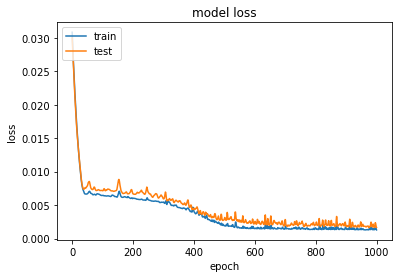

In [158]:
# summarize history for loss
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 16ms/step - loss: 0.0017
Loss: 0.0016828400548547506


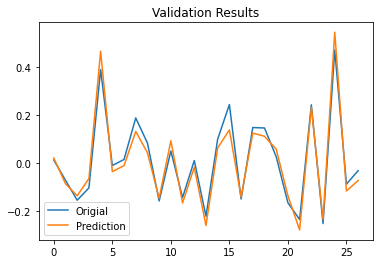

In [159]:
yp = m.predict(X_test)
print('Loss:', m.evaluate(X_test, y_test))
plt.plot(yp, label='Origial')
plt.plot(y_test, label='Prediction')
plt.legend(loc=0)
plt.title('Validation Results')
plt.show()

In [160]:
yp = m.predict(X_test).reshape(-1)
print('Loss:', m.evaluate(X_test, y_test))  
print(yp.shape, y_test.shape)

1/1 [==============================] - 0s 17ms/step - loss: 0.0017
Loss: 0.0016828400548547506
(27,) (27,)


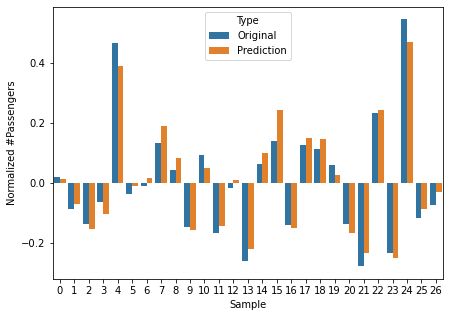

In [161]:
df = pd.DataFrame()
df['Sample'] = list(range(len(y_test))) * 2
df['Normalized #Passengers'] = np.concatenate([y_test, yp], axis=0)
df['Type'] = ['Original'] * len(y_test) + ['Prediction'] * len(yp)

plt.figure(figsize=(7, 5))
sns.barplot(x="Sample", y="Normalized #Passengers", hue="Type", data=df)
plt.ylabel('Normalized #Passengers')
plt.show()

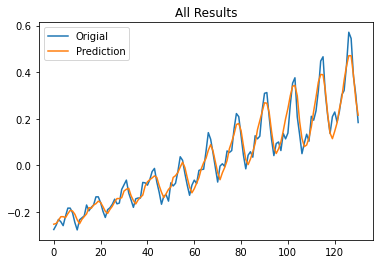

In [162]:
yp = m.predict(X)

plt.plot(y, label='Origial')
plt.plot(yp, label='Prediction')
plt.legend(loc=0)
plt.title('All Results')
plt.show()

In [96]:
model.save('ann_model.h5')

In [88]:
dfyt = pd.DataFrame(y_train)
dfyt.head()

,0
0,15.2
1,42.3
2,50.0
3,21.1
4,17.7


In [87]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,404.0,22.39505,9.210442,5.0,16.675,20.75,24.8,50.0


In [81]:
dfxt = pd.DataFrame(X_train)
dfxt.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.013782,0.000,0.281525,0.0,0.314815,0.499806,0.914521,0.297191,0.130435,0.227533,0.893617,1.000000,0.468819
1,0.000174,0.825,0.057551,0.0,0.061728,0.784082,0.131823,0.536537,0.043478,0.305927,0.223404,0.996167,0.038079
2,0.054984,0.000,0.646628,0.0,0.506173,0.272851,1.000000,0.021178,1.000000,0.913958,0.808511,0.946089,0.042219
3,0.000374,0.000,0.173387,0.0,0.267490,0.479473,0.325438,0.506821,0.173913,0.068834,0.808511,1.000000,0.173289
4,0.041439,0.000,0.646628,0.0,0.674897,0.545120,0.880536,0.150041,1.000000,0.913958,0.808511,0.986207,0.356512


In [82]:
dfxt.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,404.0,0.042023,0.103864,0.0,0.000844,0.002951,0.041233,1.0
1,404.0,0.114802,0.237677,0.0,0.000000,0.000000,0.125000,1.0
2,404.0,0.390192,0.249681,0.0,0.171188,0.338343,0.646628,1.0
3,404.0,0.061881,0.241238,0.0,0.000000,0.000000,0.000000,1.0
4,404.0,0.354642,0.241344,0.0,0.139918,0.314815,0.506173,1.0
5,404.0,0.524028,0.137449,0.0,0.448054,0.510747,0.590240,1.0
6,404.0,0.680851,0.287751,0.0,0.438465,0.778579,0.939238,1.0
7,404.0,0.272493,0.211907,0.0,0.098897,0.210079,0.416295,1.0
8,404.0,0.366982,0.378190,0.0,0.130435,0.173913,1.000000,1.0
9,404.0,0.416632,0.318116,0.0,0.173996,0.271511,0.913958,1.0


In [55]:
history = model.fit(X_train, y_train, epochs=100, batch_size=100, validation_split=0.2, verbose=2)

Epoch 1/100
4/4 - 0s - loss: 520.8763 - val_loss: 223.5731
Epoch 2/100
4/4 - 0s - loss: 115.1492 - val_loss: 93.1034
Epoch 3/100
4/4 - 0s - loss: 83.6701 - val_loss: 96.4053
Epoch 4/100
4/4 - 0s - loss: 68.5397 - val_loss: 83.2730
Epoch 5/100
4/4 - 0s - loss: 68.7683 - val_loss: 66.3159
Epoch 6/100
4/4 - 0s - loss: 57.8723 - val_loss: 58.8350
Epoch 7/100
4/4 - 0s - loss: 56.8523 - val_loss: 55.2148
Epoch 8/100
4/4 - 0s - loss: 48.9321 - val_loss: 52.8442
Epoch 9/100
4/4 - 0s - loss: 47.2415 - val_loss: 56.2275
Epoch 10/100
4/4 - 0s - loss: 44.7738 - val_loss: 50.5031
Epoch 11/100
4/4 - 0s - loss: 47.3834 - val_loss: 48.3182
Epoch 12/100
4/4 - 0s - loss: 45.1332 - val_loss: 41.9807
Epoch 13/100
4/4 - 0s - loss: 39.3519 - val_loss: 42.4638
Epoch 14/100
4/4 - 0s - loss: 47.4013 - val_loss: 43.4434
Epoch 15/100
4/4 - 0s - loss: 46.0143 - val_loss: 37.3908
Epoch 16/100
4/4 - 0s - loss: 34.1159 - val_loss: 36.9603
Epoch 17/100
4/4 - 0s - loss: 33.8607 - val_loss: 37.8827
Epoch 18/100
4/4 - 0

In [89]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


In [92]:
 performace_test = model.evaluate(X_test, y_test, batch_size=100)

2/2 [==============================] - 0s 1ms/step - loss: 27.7270


In [93]:
 print('\nTest Loss -> {:.2f}'.format(performace_test))


Test Loss -> 27.73


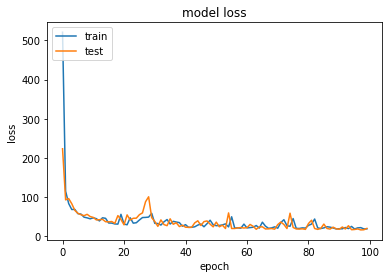

In [94]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()